In [1]:
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from tqdm import tqdm
import nltk

from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    accuracy_score
)

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
from sklearn.preprocessing import LabelEncoder
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split

nltk.download('words')
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [2]:
!wget https://raw.githubusercontent.com/jasonchrism/sentiment_analysis/main/1429_1.csv
df = pd.read_csv('1429_1.csv')

--2024-02-20 01:21:25--  https://raw.githubusercontent.com/jasonchrism/sentiment_analysis/main/1429_1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48952251 (47M) [text/plain]
Saving to: ‘1429_1.csv’

1429_1.csv          100%[===================>]  46.68M   246MB/s    in 0.2s    

2024-02-20 01:21:26 (246 MB/s) - ‘1429_1.csv’ saved [48952251/48952251]



<ipython-input-2-74430b045baa>:2: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('1429_1.csv')


In [3]:
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

**Drop Null Data**

In [5]:
df = df.dropna(subset = ['reviews.rating', 'reviews.text', 'reviews.username'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34624 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34624 non-null  object 
 1   name                  27865 non-null  object 
 2   asins                 34622 non-null  object 
 3   brand                 34624 non-null  object 
 4   categories            34624 non-null  object 
 5   keys                  34624 non-null  object 
 6   manufacturer          34624 non-null  object 
 7   reviews.date          34595 non-null  object 
 8   reviews.dateAdded     24038 non-null  object 
 9   reviews.dateSeen      34624 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34064 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34129 non-null  float64
 14  reviews.rating        34624 non-null  float64
 15  reviews.sourceURLs 

**Word Cloud**

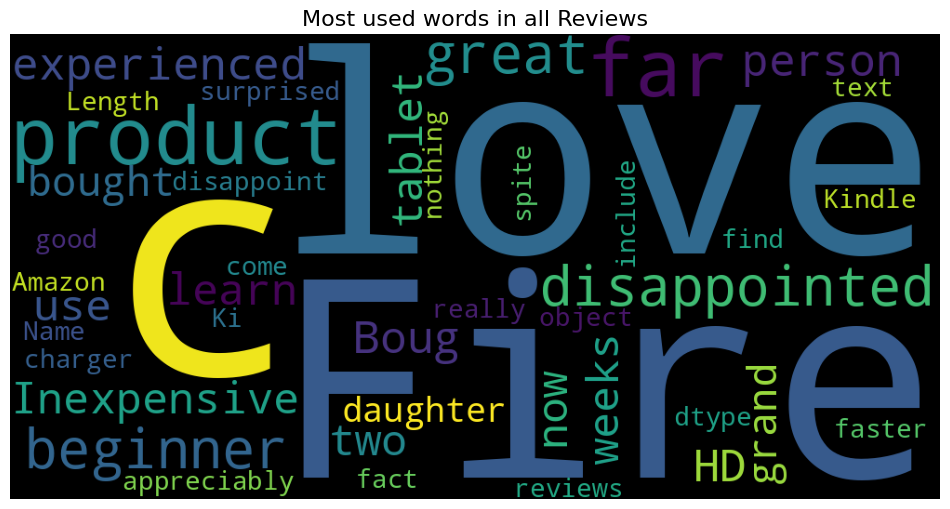

In [7]:
all_words = pd.Series(' '.join(str(df['reviews.text']).split()))

# plot word cloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(all_words))

plt.figure(figsize = (12, 8))

plt.imshow(wordcloud)
plt.title("Most used words in all Reviews", size=16)

plt.axis("off")
plt.show()

**Preprocess Text Data**

In [8]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [9]:
# wnl = WordNetLemmatizer()
# stemmer = nltk.SnowballStemmer("english")
# stemmer = nltk.PorterStemmer()
stemmer = nltk.LancasterStemmer()

stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c', 'and', 'I', 'A', 'And', 'So', 'arnt', 'This', 'When', 'It', 'many', 'Many', 'so', 'cant', 'Yes', 'yes', 'No', 'no', 'These', 'these']
stop_words = stop_words + more_stopwords

def preprocess_data(text):
    text = clean_text(text)
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)

    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    # text = ' '.join(wnl.lemmatize(word) for word in text.split(' '))

    return text

In [10]:
df['clean_review'] = df['reviews.text'].apply(preprocess_data)

**Add Sentiment Polarity Scores to new Dataframe**

In [11]:
sia = SentimentIntensityAnalyzer()
le = LabelEncoder()

df['reviews.username'] = le.fit_transform(df['reviews.username'])

temp = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
  text = row['clean_review']
  myid = row['reviews.username']
  temp[myid] = sia.polarity_scores(text)

newDf = pd.DataFrame(temp).T
newDf = newDf.reset_index().rename(columns={'index': 'reviews.username'})
newDf = newDf.merge(df, how='left')

  0%|          | 0/34624 [00:00<?, ?it/s]

**Create New Column 'Sentiment'**

In [12]:
newDf['sentiment'] = [-1 if x < -0.05 else 1 if x > 0.05 else 0 for x in newDf['compound']]

In [13]:
# sia.polarity_scores('We bought this for daughter for christmas. Fantastic tablet')

**Data Distribution**

In [14]:
newDf['sentiment'].value_counts()

 1    23977
 0     7953
-1     2694
Name: sentiment, dtype: int64

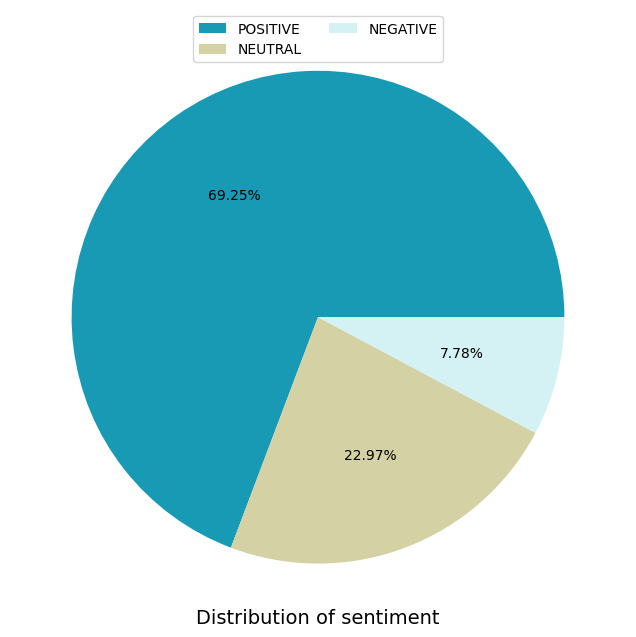

In [15]:
plt.figure(figsize = (8, 8))

labels = ['POSITIVE', 'NEUTRAL', 'NEGATIVE']
colors = ['#189AB4', '#D4D1A4', '#D4F1F4']
plt.pie(newDf['sentiment'].value_counts(), autopct='%0.2f%%',colors=colors)

plt.title('Distribution of sentiment', size=14, y=-0.01)
plt.legend(labels, ncol=2, loc=9)
plt.show()

**Split Dataset**

In [16]:
from sklearn.model_selection import train_test_split

X = newDf['clean_review']
Y = newDf['sentiment']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

**Vectorization**

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
vect.fit(x_train)

CountVectorizer()

In [18]:
x_train_dtm = vect.transform(x_train)
x_test_dtm = vect.transform(x_test)

In [19]:
vect_tunned = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.1, max_df=0.7, max_features=100)
vect_tunned

CountVectorizer(max_df=0.7, max_features=100, min_df=0.1, ngram_range=(1, 2),
                stop_words='english')

**Train and Test Model**

In [20]:
from sklearn.svm import SVC
model = SVC(kernel='linear', random_state = 10)
model.fit(x_train_dtm, y_train)

pred = model.predict(x_test_dtm)

In [21]:
accuracy_score(y_test, pred)

0.8550180505415163

In [22]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

          -1       0.62      0.48      0.54       537
           0       0.78      0.80      0.79      1565
           1       0.90      0.91      0.91      4823

    accuracy                           0.86      6925
   macro avg       0.77      0.73      0.75      6925
weighted avg       0.85      0.86      0.85      6925



**Other Models**

In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
clf_multiNB_pipe = Pipeline([("vect", CountVectorizer()),
                             ("tfidf", TfidfTransformer()),
                             ("clf_nominalNB", MultinomialNB())])
clf_multiNB_pipe.fit(x_train, y_train)

predictedMultiNB = clf_multiNB_pipe.predict(x_test)
mnb = np.mean(predictedMultiNB == y_test)
mnb*100

69.68953068592057

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
clf_logReg_pipe = Pipeline([("vect", CountVectorizer()),
                            ("tfidf", TfidfTransformer()),
                            ("clf_logReg", LogisticRegression(max_iter = 1000))])
clf_logReg_pipe.fit(x_train, y_train)

predictedLogReg = clf_logReg_pipe.predict(x_test)
lrc = np.mean(predictedLogReg == y_test)
lrc*100

83.5523465703971

In [25]:
from sklearn.tree import DecisionTreeClassifier
clf_decisionTree_pipe = Pipeline([("vect", CountVectorizer()),
                                  ("tfidf", TfidfTransformer()),
                                  ("clf_decisionTree", DecisionTreeClassifier())
                                 ])
clf_decisionTree_pipe.fit(x_train, y_train)

predictedDecisionTree = clf_decisionTree_pipe.predict(x_test)
dtc = np.mean(predictedDecisionTree == y_test)
dtc*100

79.27797833935018

In [26]:
from sklearn.ensemble import RandomForestClassifier
clf_randomForest_pipe = Pipeline([("vect", CountVectorizer()),
                                  ("tfidf", TfidfTransformer()),
                                  ("clf_randomForest", RandomForestClassifier())
                                 ])
clf_randomForest_pipe.fit(x_train, y_train)

predictedRandomForest = clf_randomForest_pipe.predict(x_test)
rfc = np.mean(predictedRandomForest == y_test)
rfc*100

80.88086642599278

# **Function to Analyze Review with SVM**

In [164]:
def svm_model(input_user):
  svm_val = sia.polarity_scores(input_user)

  if (svm_val['compound'] > 0):
    print('Positive sentiment')
  else:
    print('Negative sentiment')

## **MODEL : LSTM (Long Short Term Memory)**

In [27]:
df['sentiment_text'] = np.where(df['reviews.rating'] > 3, 'positive',
                           np.where(df['reviews.rating'] == 3, 'neutral', 'negative'))

In [28]:
lstm_df = df[['clean_review','sentiment_text']]

**Select only Positive and Negative Reviews**

In [29]:
lstm_df = lstm_df[lstm_df['sentiment_text'] != 'neutral']

**Split the dataset**

In [30]:
# Attribute and Labels
X = lstm_df['clean_review']
y = lstm_df.sentiment_text

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Checking Train Set
print("Training Set X Items: " + str(len(X_train)))
print("Training Set y Items: " + str(len(y_train)))

print()

# Checking Test Set
print("Test Set X Items: " + str(len(X_test)))
print("Test Set y Items: " + str(len(y_test)))

Training Set X Items: 26500
Training Set y Items: 26500

Test Set X Items: 6625
Test Set y Items: 6625


In [33]:
# Getting required labels only and encoding

review_labels_train = y_train.factorize()

print(review_labels_train[0])
print(review_labels_train[1])

[0 0 0 ... 0 0 0]
Index(['positive', 'negative'], dtype='object')


In [120]:
# Importing required tf modules
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [35]:
vocab = X_train.values
vocab

array(['cap wireless bluetoo speak real geni aw inspir voic recognit blow away sir voic assist someth real mag us voic comput interfac const air upd mean dev gain new funct every week',
       'ton thing alex play mus tel jok uod new mak phon cal jut gre new technolog mak lif ton easy',
       'wif lov kindl big upgrad  gen work wel tablet eread', ...,
       'purchas gift techchalleng lov on  setup quick start simpl straightforward eas load lot fre libr book alon mad wel wor purchas howev reserv regard outdo glar id recommend try firsthand buy',
       'us read book read lot book right siz light situ',
       'help keep son entertain long rid pretty indestruct'], dtype=object)

**Vectorization**

In [121]:
# Vectorize a text corpus, by turning each text into sequence of integers

tokenizer = Tokenizer(num_words=8000,oov_token='OOV')
tokenizer.fit_on_texts(vocab)

vocab_size = len(tokenizer.word_index) + 1

print(tokenizer)
print(vocab_size)

9811


In [37]:
# # To save the tokenized vocab for Web app
# import pickle
# with open('tokenizer.pickle', 'wb') as handle:
#     pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [122]:
# Store and Padding Converted Sequences
review = X_train.values

review_seqs = tokenizer.texts_to_sequences(review)

padded_sequence_train = pad_sequences(review_seqs, maxlen=200)
print(padded_sequence_train)
print(padded_sequence_train[0])

[[   0    0    0 ...  189  130  262]
 [   0    0    0 ...  114  405    6]
 [   0    0    0 ...   35    5  195]
 ...
 [   0    0    0 ...  240    1   29]
 [   0    0    0 ...   74   34 1008]
 [   0    0    0 ...  612  159 1978]]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0  

**Build the model**

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras import models

embedding_vector_length = 32

# model = Sequential()
# model.add(Embedding(vocab_size, embedding_vector_length,
#                                      input_length=200) )
# model.add(SpatialDropout1D(0.25))
# model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
# model.add(Dropout(0.2))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
# print(model.summary())

In [40]:
# # Used to save trained model

# model.save("sentiment_analysis.h5")
# print("Model Saved")

**Train the model**

In [ ]:
trained = lstm_model_sentiment.fit(padded_sequence_train,review_labels_train[0],
                  validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
378/663 [================>.............] - ETA: 1:34 - loss: 0.1338 - accuracy: 0.9711

In [123]:
# Encoding and Padding Test Data to Check Accuracy

encoded_docs = tokenizer.texts_to_sequences(X_test)
padded_sequence_test = pad_sequences(encoded_docs, maxlen=200)
print(padded_sequence_test)

sentiment_label_test = y_test.factorize()
print(sentiment_label_test[0])

[[   0    0    0 ...   47 4028 1770]
 [   0    0    0 ...   32  111  322]
 [   0    0    0 ...    0  346    1]
 ...
 [   0    0    0 ...   24   14  420]
 [   0    0    0 ...  330  125   82]
 [   0    0    0 ...  119  410  268]]
[0 0 0 ... 0 0 0]


In [141]:
#Code to load the saved model
lstm_model_sentiment = models.load_model('sentiment_analysis.h5')
print("Model Loaded")
lstm_model_sentiment.summary()

Model Loaded
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 32)           372352    
                                                                 
 spatial_dropout1d_1 (Spati  (None, 200, 32)           0         
 alDropout1D)                                                    
                                                                 
 lstm_1 (LSTM)               (None, 50)                16600     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 389003 (1.48 MB)
Trainable params: 389003 (1.48 MB)
Non-trainable params: 0 (0.00 Byte)
_____

**Accuracy**

In [142]:
score = lstm_model_sentiment.evaluate(padded_sequence_test,sentiment_label_test[0],verbose=0)
print("Accuracy: {}".format(score[1]))

Accuracy: 0.8630943298339844


In [45]:
!pip install Keras-Preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.8 MB/s eta 0:00:00


In [126]:
import pickle
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [100]:
# Test Review Sentence
from tensorflow.keras.preprocessing.sequence import pad_sequences
# test_word ="""
# These masks were a steal! 50 for 12$!! They are soft, breathable, light, comfortable and professional. It doesn’t hurt or irritate my ears and where they glue the straps to the mask isn’t hard and crusty like the basic blue ones. These are great!
# """

test_word = """
i'm so in love with this product, even the price is cheap but the quality is actually very nice
"""

test_word = "fuck this product"

# To
rev = tokenizer.texts_to_sequences([test_word])
rev = pad_sequences(rev,maxlen=200)

rev

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [86]:
review_prediction = np.append(review_labels_train[1][1], review_labels_train[1][0])
review_prediction[0]

'negative'

In [143]:
prediction = int(lstm_model_sentiment.predict(rev).round().item())
outcome = (review_labels_train[1][prediction]).capitalize()

print("Actual Review: " + test_word)
print("\nSentiment Analysis Outcome ==> The review shows " + (review_prediction[prediction]).capitalize() + " sentiment.")
print("\n======================================================================================")

print("\nAccuracy Criteria \n\nProbability Closer to 0 == Negative Sentiment\nProbability Closer to 1 == Positive Sentiment")

prob = lstm_model_sentiment.predict(rev)[0][0]

print("\n ==> Probability is " + str(prob))

1/1 [==============================] - 0s 303ms/step
Actual Review: fuck this product

Sentiment Analysis Outcome ==> The review shows Negative sentiment.


Accuracy Criteria 

Probability Closer to 0 == Negative Sentiment
Probability Closer to 1 == Positive Sentiment
1/1 [==============================] - 0s 54ms/step

 ==> Probability is 0.23149349


# **Function to analyze review with LSTM**

In [144]:
def lstm_model(input_user):
  import pickle
  with open('tokenizer.pickle', 'rb') as handle:
    lstm_tokenizer = pickle.load(handle)
  rev = lstm_tokenizer.texts_to_sequences([input_user])
  rev = pad_sequences(rev,maxlen=200)

  prediction = int(lstm_model_sentiment.predict(rev).round().item())

  print((review_prediction[prediction]).capitalize() + " sentiment.")

## **MODEL : ROBERTA**

In [128]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [145]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
roberta_pretrained_model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [130]:
# Run for Roberta Model
encoded_text = tokenizer("this product is bad", return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.97909045, 'roberta_neu': 0.018118177, 'roberta_pos': 0.0027914427}


In [52]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = roberta_pretrained_model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [53]:
df.insert(0, 'Id', range(1, 1 + len(df)))

In [54]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['clean_review']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/34624 [00:00<?, ?it/s]

Broke for id 2914
Broke for id 21198


# **Function to analyze review with Roberta**

In [151]:
def roberta_model(input_user):
  encoded_text = tokenizer(input_user, return_tensors='pt')
  output = roberta_pretrained_model(**encoded_text)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  if scores[0] > 0.5:
    print('Negative sentiment')
  else:
    print('Positive sentiment')

# **Comparing Results from 3 Models**

In [168]:
input_user = input()

print()
print("SVM Model : ")
svm_model(input_user)

print()
print("LSTM Model : ")
lstm_model(input_user)

print()
print("Roberta Model : ")
roberta_model(input_user)

the product is not bad

SVM Model : 
Positive sentiment

LSTM Model : 
1/1 [==============================] - 0s 44ms/step
Negative sentiment.

Roberta Model : 
Positive sentiment
